# InfoGAN analysis

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import torch
from torch.autograd import Variable
import torchvision

from infogan.models import Generator32
from infogan.utils import Code
import interpolation as itp

In [4]:
code = Code(10, 5, 'uniform')
latent_size = 100
z_size = latent_size - code.latent_size

In [5]:
G = Generator32(latent_size, 64, 1)
G.load_state_dict(torch.load('results/saved_data/mnist_InfoGAN_64_generator', map_location=lambda storage, loc: storage))

In [96]:
n_classes = 10
onehot = torch.eye(n_classes).view(n_classes,n_classes)
z = torch.FloatTensor(1,z_size,1,1).normal_()
z = Variable(z)
k = 0
c_dis = onehot[k].view(1,-1)

In [7]:
n_classes = 10
fixed_z = torch.FloatTensor(10, latent_size - code.n_classes, 1, 1).normal_(0,1)
fixed_z = fixed_z.repeat(5,1,1,1)
onehot = torch.eye(n_classes).view(n_classes,n_classes)
fixed_c = onehot.repeat(5,1)

In [25]:
def show_result(z, c=None, G=G):
    
    z = Variable(z, volatile=True)
    if c is not None:
        c = Variable(c, volatile=True)
        samples = G(z,c).data.numpy()
    else:
        samples = G(z).data.numpy()
        
    samples = samples.transpose(0, 2, 3, 1)
    samples = (samples + 1) / 2
    n_samples = samples.shape[0]
    n_columns = min(n_samples, 10)
    n_rows = 1 + n_samples//n_columns - (n_samples%n_columns==0)
    
    if n_samples == 1:
        plt.imshow(samples[0].squeeze())
        return 
    
    fig, ax = plt.subplots(n_rows, n_columns, figsize=(18, n_rows*2))
    if n_samples<=n_columns:
        for j in range(n_columns):
            ax[j].get_xaxis().set_visible(False)
            ax[j].get_yaxis().set_visible(False)
            ax[j].cla()
            if samples[j].shape[-1] == 1:
                ax[j].imshow(samples[j].squeeze(), cmap='gray')
            else:
                ax[j].imshow(samples[j])
    else:
        for i in range(n_rows):
            for j in range(n_columns):
                ax[i, j].get_xaxis().set_visible(False)
                ax[i, j].get_yaxis().set_visible(False)
                ax[i, j].cla()
                if samples[i*10+j].shape[-1] == 1:
                    ax[i, j].imshow(samples[i*10+j].squeeze(), cmap='gray')
                else:
                    ax[i, j].imshow(samples[i*10+j])
            
    plt.show()

def show_interpolation(z1, z2, n, mode = 'lerp', G=G):
    z1 = z1.view(1,-1,1,1)
    z2 = z2.view(1,-1,1,1)
    vals = np.linspace(0, 1, n)
    z = torch.Tensor([])
    for v in vals:
        if mode == 'lerp':
            res = itp.lerp(v, z1, z2)
        else:
            z1n = z1.numpy().reshape(-1)
            z2n = z2.numpy().reshape(-1)
            res = itp.slerp(v, z1n, z2n)
            res = torch.Tensor(res).view(1,-1,1,1)
            
        z = torch.cat([z, res],0)
        
    show_result(G, z)

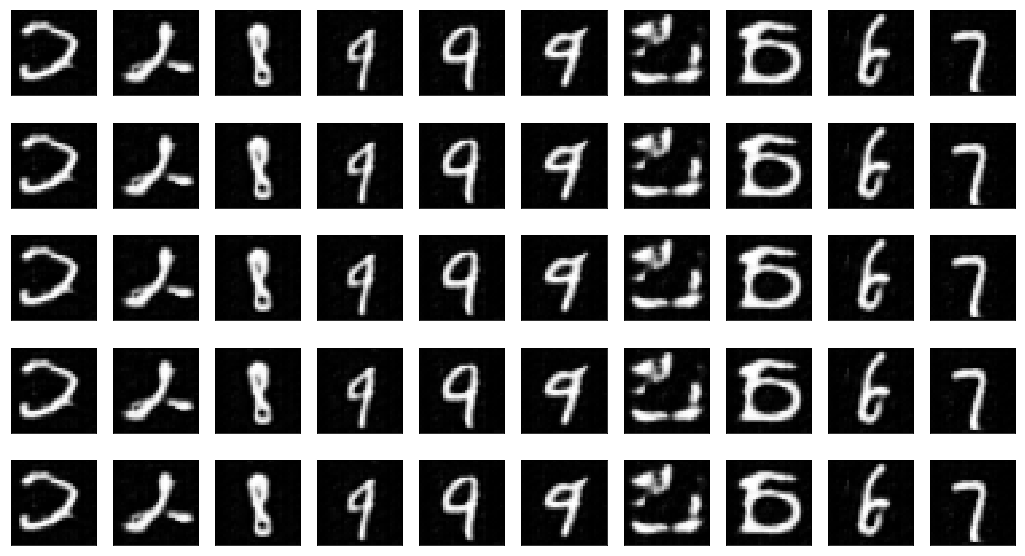

In [26]:
show_result(fixed_z, fixed_c)

In [27]:
fixed_c


    1     0     0     0     0     0     0     0     0     0
    0     1     0     0     0     0     0     0     0     0
    0     0     1     0     0     0     0     0     0     0
    0     0     0     1     0     0     0     0     0     0
    0     0     0     0     1     0     0     0     0     0
    0     0     0     0     0     1     0     0     0     0
    0     0     0     0     0     0     1     0     0     0
    0     0     0     0     0     0     0     1     0     0
    0     0     0     0     0     0     0     0     1     0
    0     0     0     0     0     0     0     0     0     1
    1     0     0     0     0     0     0     0     0     0
    0     1     0     0     0     0     0     0     0     0
    0     0     1     0     0     0     0     0     0     0
    0     0     0     1     0     0     0     0     0     0
    0     0     0     0     1     0     0     0     0     0
    0     0     0     0     0     1     0     0     0     0
    0     0     0     0     0     0    